**涴喻**

In [4]:
#Kaggle離職預測分析
#員工離職預測,根據來自 HR 的員工數據，讓我們嘗試分析哪些模型預測準確率最高。

In [5]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.metrics import classification_report,roc_curve,auc
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, precision_score

#迴歸分析和計算VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#from google.colab import drive #讓colab連線Gdrive

In [6]:
'''
drive.mount('/content/gdrive')
data = pd.read_csv(r'/content/gdrive/MyDrive/Colab Notebooks/111-1AI/HRDataset_v14.csv')
'''
data = pd.read_csv(r'HRDataset_v14.csv')

In [7]:
data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [9]:
#Preprocessing

0    207
1    104
Name: Termd, dtype: int64


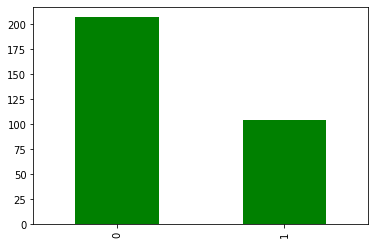

In [10]:
print(data['Termd'].value_counts())
data['Termd'].value_counts().plot(kind='bar',color='g')

1    184
5     88
3     14
4     14
2     11
Name: EmpStatusID, dtype: int64


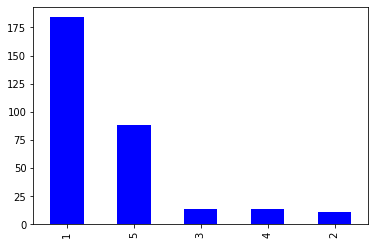

In [11]:
print(data['EmpStatusID'].value_counts())
data['EmpStatusID'].value_counts().plot(kind='bar',color='b')

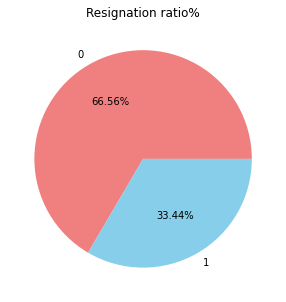

In [12]:
#離職比例33.44%
#可以看到非離職與已離職比例大概是6：4，這樣就是個差不多正常的比例。可以處理也可以不處理
import matplotlib.pyplot as plt
plt.figure( figsize=(10,5) )
data['Termd'].value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'Resignation ratio%' )  # 圖標題
plt.ylabel( '' )
plt.show()

F     176
M     135
Name: Sex, dtype: int64


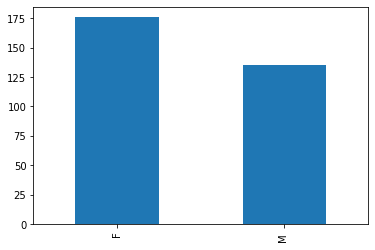

In [13]:
print(data['Sex'].value_counts())
data['Sex'].value_counts().plot(kind='bar')

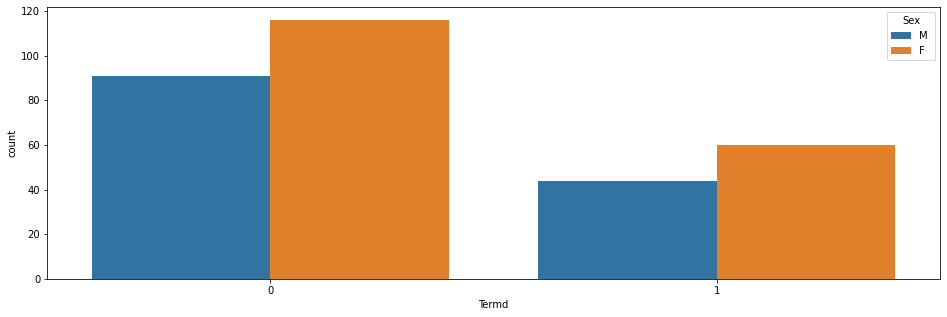

In [14]:
plt.figure(figsize=(16,5))
sns.countplot(x=data['Termd'],hue=data['Sex'])

In [15]:
def encode_dates(df, columns_with_prefixes):
    df = df.copy()
    
    for column, prefix in columns_with_prefixes:
        df[column] = pd.to_datetime(df[column])
        
        df[prefix + '_year'] = df[column].apply(lambda x: x.year)
        df[prefix + '_month'] = df[column].apply(lambda x: x.month)
        df[prefix + '_day'] = df[column].apply(lambda x: x.day)
        
        df = df.drop(column, axis=1)
        
    return df

def ordinal_encode(df, columns_with_orderings):
    df = df.copy()
    
    for column, ordering in columns_with_orderings:
        df[column] = df[column].apply(lambda x: ordering.index(x))
        
    return df

#新增的處理
def dealwith_capitalization(df, columns_with_prefixes):
    df = df.copy()
    
    for column in columns_with_prefixes:
         df[column] = df[column].str.title()
    
    return df


#討論暫時不放職位的分類，因為對模型預測幫助不大
#更新: 12/17與許英麟老師確認，此作法可行，模型精準度些微下降的狀況是正常的，但精準度變化不大的情況，可能也代表此變數重要性不高。
def position_rank(df, columns_with_position):
    df=df.copy()
    
    for column in columns_with_position:
        condition1 = df[column].str.contains("Manager")
        df[column][condition1]="General Manager"
        condition2 = df[column].str.contains("Director|C")
        df[column][condition2]="Senior Manager"
        condition3 = df[column].str.contains("Senior|Sr.")
        df[column][condition3]="Senior Staff"
        condition4 = df[column].str.contains("General Manager|Senior Manager|Senior Staff")
        df[column][~condition4]="General Staff"
        
    return df

def encode_state(df, columns_with_state):
    df = df.copy()
    
    for  column in columns_with_state:
        data = df[column]=="MA"
        df = df.drop(column, axis=1)
        ordering = [False,True]
        data2 = data.apply(lambda x: ordering.index(x))
        df = pd.concat([df, data2], axis=1)

    return df
        
        
def onehot_encode(df, columns_with_prefixes):
    df = df.copy()
    
    for column, prefix in columns_with_prefixes:
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    
    return df

In [16]:
# 回歸的處理方法，保留小魚的原始做法，這邊只呈現針對回歸分析的code
# 並不回傳train和test資料，直接回傳x和y

def preprocess_inputs(df,scaler,do_scaler):
    df = df.copy()
    
    # Drop unneeded columns
    # 221128討論把zip欄位也拿掉
    df = df.drop(['Employee_Name', 'EmpID', 'MaritalStatusID', 'Sex', 'PositionID', 'DeptID', 'PerfScoreID', 
                  'EmpStatusID', 'EmploymentStatus', 'DateofTermination', 'TermReason', 'ManagerID','Zip'], axis=1)
    
    # Date encoding
    date_columns = [
        ('DOB', "DOB"),
        ('DateofHire', "DOH"),
        ('LastPerformanceReview_Date', "PRD")
    ]
    df = encode_dates(df, columns_with_prefixes=date_columns)
    
    # Ordinal encoding
    ordinal_columns = [
        ('PerformanceScore', ['PIP', 'Needs Improvement', 'Fully Meets', 'Exceeds'])
    ]
    df = ordinal_encode(df, columns_with_orderings=ordinal_columns)
    
    # Deal with capitalization
    title_prefix_columns = [('HispanicLatino')]
    df = dealwith_capitalization(df, columns_with_prefixes=title_prefix_columns)

    
    # Deal with position
    title_prefix_columns = [('Position')]
    df = position_rank(df, columns_with_position=title_prefix_columns)
    
    
    #State Classification
    state_columns = [('State')]
    df = encode_state(df,columns_with_state=state_columns)
    
    
    # One-hot encoding
    
    nominal_columns = [
        ('Position', "PS"),
        ('State', "ST"),
        ('MaritalDesc', "MD"),
        ('CitizenDesc', "CD"),
        ('HispanicLatino', "HL"),
        ('RaceDesc', "RD"),
        ('Department', "DE"),
        ('ManagerName', "MN"),
        ('RecruitmentSource', "RS")
    ]
    
    df = onehot_encode(df, columns_with_prefixes=nominal_columns)
    
     # Split df into X and y
    y = df['Termd'].copy()
    X = df.drop('Termd', axis=1)
    
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)
    

    # Scale x
    if do_scaler == True :
      scaler.fit(X_train)
      X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
      X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
      return X, y, X_train, X_test, y_train, y_test
    else:
      return X, y, X_train, X_test, y_train, y_test 

In [17]:
scaler = MinMaxScaler()
X, y, X_train, X_test, y_train, y_test = preprocess_inputs(data, scaler, True)

<ipython-input-15-8c74d9923f4f>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][condition1]="General Manager"
<ipython-input-15-8c74d9923f4f>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][condition2]="Senior Manager"
<ipython-input-15-8c74d9923f4f>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][condition3]="Senior Staff"
<ipython-input-15-8c74d9923f4f>:46: SettingWithCopyWarning: 
A value is tr

In [18]:
X_train

,MarriedID,GenderID,FromDiversityJobFairID,Salary,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,...,MN_Webster Butler,RS_CareerBuilder,RS_Diversity Job Fair,RS_Employee Referral,RS_Google Search,RS_Indeed,RS_LinkedIn,RS_On-line Web application,RS_Other,RS_Website
0,0.0,1.0,0.0,0.080510,0.000000,0.208763,0.50,0.000,1.000000,0.210526,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.048133,0.333333,0.734536,0.75,0.000,0.500000,0.736842,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.270076,0.666667,0.896907,0.50,0.500,0.000000,0.421053,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.083409,0.666667,0.548969,1.00,0.000,0.000000,0.736842,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.051281,0.666667,0.793814,1.00,0.000,0.000000,0.631579,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,0.0,0.0,0.0,0.082916,0.666667,0.639175,1.00,0.000,0.000000,0.157895,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
213,0.0,0.0,0.0,0.033431,0.666667,1.000000,0.50,0.625,0.000000,0.052632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
214,0.0,0.0,0.0,0.069106,0.000000,0.304124,0.00,0.000,0.333333,0.842105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
215,1.0,1.0,0.0,0.026150,0.666667,1.000000,0.50,0.000,0.000000,0.526316,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
y_train

67     0
105    1
285    1
34     0
234    1
      ..
203    0
255    0
72     0
235    1
37     0
Name: Termd, Length: 217, dtype: int64

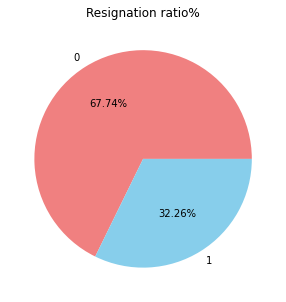

In [20]:
plt.figure(figsize=(10,5))
y_train.value_counts().plot(kind='pie',colors=['lightcoral','skyblue'], autopct='%1.2f%%')
plt.title('Resignation ratio%') # 圖標題
plt.ylabel('')
plt.show()

In [21]:
nominal_columns = ('Position','State','MaritalDesc','CitizenDesc','HispanicLatino',
                   'RaceDesc','Department','ManagerName','RecruitmentSource')

for i in nominal_columns :
    print (data[i].value_counts(),'\n')

Production Technician I         137
Production Technician II         57
Area Sales Manager               27
Production Manager               14
Software Engineer                10
IT Support                        8
Data Analyst                      7
Sr. Network Engineer              5
Database Administrator            5
Network Engineer                  5
BI Developer                      4
Senior BI Developer               3
Administrative Assistant          3
Sales Manager                     3
Accountant I                      3
Sr. DBA                           2
IT Manager - DB                   2
Sr. Accountant                    2
Director of Operations            1
Shared Services Manager           1
Data Analyst                      1
Data Architect                    1
Principal Data Architect          1
IT Manager - Infra                1
President & CEO                   1
Enterprise Architect              1
BI Director                       1
Director of Sales           

In [22]:
#Imbalanced Data

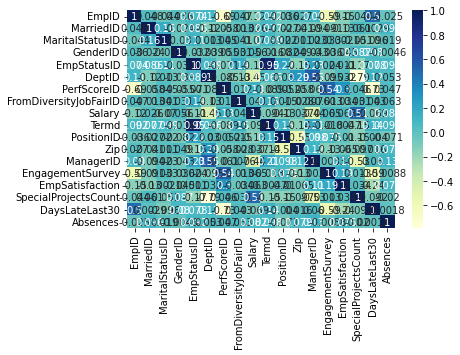

In [23]:
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

In [24]:
#未做不平衡處理的分數
models = {
    "   K-Nearest Neighbors": KNeighborsClassifier(),
    "   Logistic Regression": LogisticRegression(max_iter=10000),
    "Support Vector Machine": SVC(),
    "         Decision Tree": DecisionTreeClassifier(),
    "        Neural Network": MLPClassifier(max_iter=10000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
print("未做不平衡處理的分數")
#Results
for name, model in models.items():
    print(name + " Accuracy: {:.2f}%".format(model.score(X_test, y_test) * 100))

未做不平衡處理的分數
   K-Nearest Neighbors Accuracy: 76.60%
   Logistic Regression Accuracy: 90.43%
Support Vector Machine Accuracy: 90.43%
         Decision Tree Accuracy: 98.94%
        Neural Network Accuracy: 90.43%


In [25]:
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [26]:
#Training

In [27]:
#有做不平衡處理的分數
models = {
    "   K-Nearest Neighbors": KNeighborsClassifier(),
    "   Logistic Regression": LogisticRegression(max_iter=10000),
    "Support Vector Machine": SVC(),
    "         Decision Tree": DecisionTreeClassifier(),
    "        Neural Network": MLPClassifier(max_iter=10000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
print("有做不平衡處理的分數")
#Results
for name, model in models.items():
    print(name + " Accuracy: {:.2f}%".format(model.score(X_test, y_test) * 100))

有做不平衡處理的分數
   K-Nearest Neighbors Accuracy: 69.15%
   Logistic Regression Accuracy: 92.55%
Support Vector Machine Accuracy: 90.43%
         Decision Tree Accuracy: 98.94%
        Neural Network Accuracy: 88.30%


**仕欽**

In [28]:
X, y, X_train, X_test, y_train, y_test = preprocess_inputs(data,StandardScaler(),False)

<ipython-input-15-8c74d9923f4f>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][condition1]="General Manager"
<ipython-input-15-8c74d9923f4f>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][condition2]="Senior Manager"
<ipython-input-15-8c74d9923f4f>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][condition3]="Senior Staff"
<ipython-input-15-8c74d9923f4f>:46: SettingWithCopyWarning: 
A value is tr

In [29]:
X_train

,MarriedID,GenderID,FromDiversityJobFairID,Salary,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,...,MN_Webster Butler,RS_CareerBuilder,RS_Diversity Job Fair,RS_Employee Referral,RS_Google Search,RS_Indeed,RS_LinkedIn,RS_On-line Web application,RS_Other,RS_Website
67,0,1,0,61568,0,1.93,3,0,6,5,...,0,0,0,0,0,1,0,0,0,0
105,1,1,1,54933,1,3.97,4,0,3,15,...,1,0,1,0,0,0,0,0,0,0
285,0,1,1,100416,2,4.60,3,4,0,9,...,0,0,1,0,0,0,0,0,0,0
34,1,1,0,62162,2,3.25,5,0,0,15,...,0,0,0,0,0,1,0,0,0,0
234,1,1,0,55578,2,4.20,5,0,0,13,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0,0,0,62061,2,3.60,5,0,0,4,...,0,0,0,0,0,0,1,0,0,0
255,0,0,0,51920,2,5.00,3,5,0,2,...,0,0,0,0,0,0,0,0,0,1
72,0,0,0,59231,0,2.30,1,0,2,17,...,0,0,0,0,0,0,0,0,0,1
235,1,1,0,50428,2,5.00,3,0,0,11,...,0,0,0,0,0,1,0,0,0,0


In [30]:
X_1 = sm.add_constant(X)

model = sm.OLS(y, X_1)
result = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [31]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Termd   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     18.91
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           7.08e-66
Time:                        13:34:47   Log-Likelihood:                 71.395
No. Observations:                 311   AIC:                            -10.79
Df Residuals:                     245   BIC:                             236.0
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [41]:
vif=[variance_inflation_factor(X_1.values,X_1.columns.get_loc(i)) for i in X_1.columns]
list(zip(list(range(1,106)),vif))

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[(1, 0.0),
 (2, inf),
 (3, 1.2536139898560463),
 (4, inf),
 (5, 7.232436940440646),
 (6, 3.0646302967058765),
 (7, 1.8969562709115106),
 (8, 1.331973303283348),
 (9, 26.71105465384195),
 (10, 3.0247421876615492),
 (11, 1.264786454482813),
 (12, 1.5144634016813103),
 (13, 1.223499299999828),
 (14, 1.2062023961488828),
 (15, 2.277428339499456),
 (16, 1.3370486700049393),
 (17, 1.2512957541850065),
 (18, 2.148668192459189),
 (19, 1.9032989043481705),
 (20, 1.5461187621641508),
 (21, inf),
 (22, inf),
 (23, inf),
 (24, inf),
 (25, inf),
 (26, inf),
 (27, inf),
 (28, inf),
 (29, inf),
 (30, inf),
 (31, inf),
 (32, inf),
 (33, inf),
 (34, inf),
 (35, inf),
 (36, inf),
 (37, inf),
 (38, inf),
 (39, inf),
 (40, inf),
 (41, inf),
 (42, inf),
 (43, inf),
 (44, inf),
 (45, inf),
 (46, inf),
 (47, inf),
 (48, inf),
 (49, inf),
 (50, inf),
 (51, inf),
 (52, inf),
 (53, inf),
 (54, inf),
 (55, inf),
 (56, inf),
 (57, inf),
 (58, inf),
 (59, inf),
 (60, inf),
 (61, inf),
 (62, inf),
 (63, inf),
 (64,

In [33]:
rfc=RandomForestClassifier() #n_estimators=100,n_jobs = -1,random_state =50, min_samples_leaf = 10

In [34]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
y_pred = rfc.predict(X_test)

In [36]:
rfc.score(X_test,y_test)

0.9893617021276596

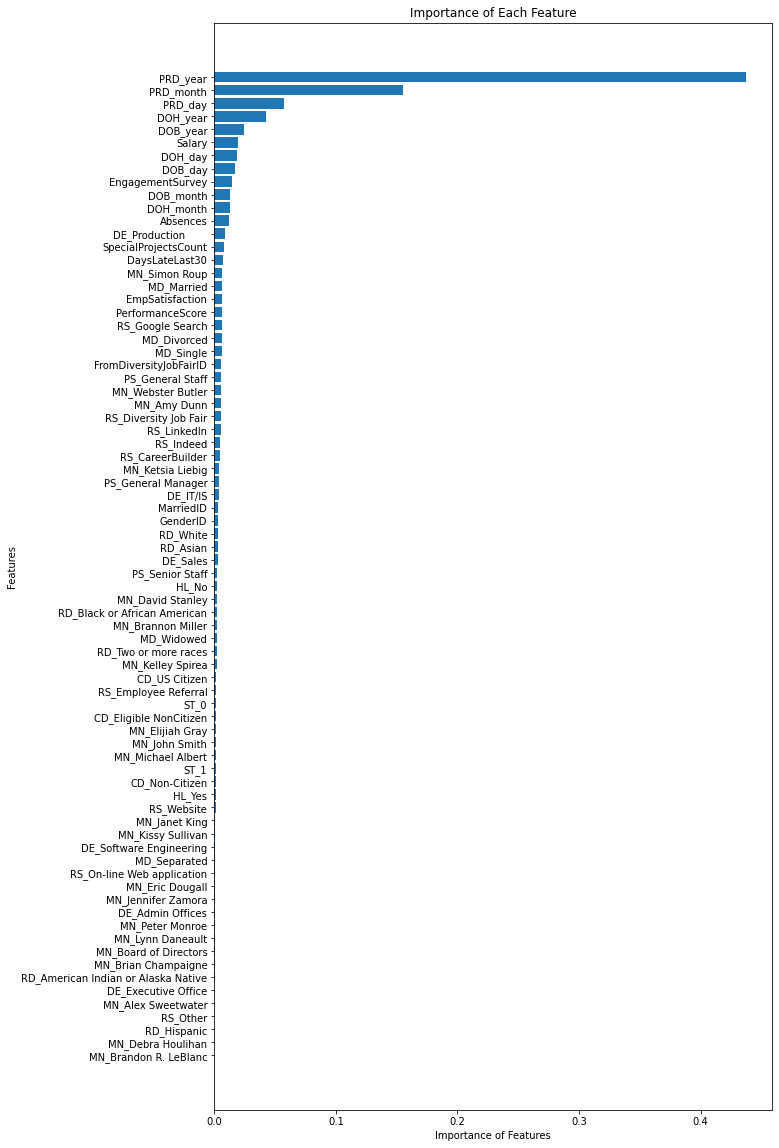

In [37]:
imp=rfc.feature_importances_
names=X.columns

zip(imp,names)
imp, names= zip(*sorted(zip(imp,names)))
plt.figure(figsize=(10,20))
plt.barh(range(len(names)),imp,align='center')
plt.yticks(range(len(names)),names)
plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title('Importance of Each Feature')
plt.show()

**瑋哲**

In [38]:
# 可用StandardScaler, MinMaxScaler , MaxAbsScaler, RobustScaler
scalers = {
    "StandardScaler_": StandardScaler(), 
    "MinMaxScaler_": MinMaxScaler(), 
    "MaxAbsScaler_": MaxAbsScaler(),
    "RobustScaler_": RobustScaler()
}
# scaler = RobustScaler() #中位數和四分位數標準化 可以有效的縮放帶有outlier的數據，透過Robust如果數據中含有異常值在縮放中會捨去。
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Neural Network": MLPClassifier(max_iter=10000),
    "RandomForest": RandomForestClassifier()
}


x, y, x_train, x_test, y_train, y_test = preprocess_inputs(data,StandardScaler(), True)
Accuracy1 = []
Precision_score1 = []
for name, model in models.items():
    model.fit(x_train, y_train)
    Accuracy1.append(round(model.score(x_test, y_test),2))
    Precision_score1.append(round(precision_score(model.predict(x_test), y_test),2))


x, y, x_train, x_test, y_train, y_test = preprocess_inputs(data, MinMaxScaler(), True)
Accuracy2 = []
Precision_score2 = []
for name, model in models.items():
    model.fit(x_train, y_train)
    Accuracy2.append(round(model.score(x_test, y_test),2))
    Precision_score2.append(round(precision_score(model.predict(x_test), y_test),2))


x, y, x_train, x_test, y_train, y_test = preprocess_inputs(data, MaxAbsScaler(), True)
Accuracy3 = []
Precision_score3 = []
for name, model in models.items():
    model.fit(x_train, y_train)
    Accuracy3.append(round(model.score(x_test, y_test),2))
    Precision_score3.append(round(precision_score(model.predict(x_test), y_test),2))


x, y, x_train, x_test, y_train, y_test = preprocess_inputs(data, RobustScaler(), True)
Accuracy4 = []
Precision_score4 = []
for name, model in models.items():
    model.fit(x_train, y_train)
    Accuracy4.append(round(model.score(x_test, y_test),2))
    Precision_score4.append(round(precision_score(model.predict(x_test), y_test),2))

colnames = {0:"K-Nearest Neighbors",1:"Logistic Regression",2:"Support Vector Machine",3:"Decision Tree",4:"Neural Network",5:"RandomForest"}



<ipython-input-15-8c74d9923f4f>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][condition1]="General Manager"
<ipython-input-15-8c74d9923f4f>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][condition2]="Senior Manager"
<ipython-input-15-8c74d9923f4f>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][condition3]="Senior Staff"
<ipython-input-15-8c74d9923f4f>:46: SettingWithCopyWarning: 
A value is tr

In [39]:
Tb =  {"StandardScaler":Accuracy1,"MinMaxScaler":Accuracy2,"MaxAbsScaler":Accuracy3,"RobustScaler":Accuracy4}
df = pd.DataFrame(Tb).T
df.rename(columns=colnames,inplace=True)
df

,K-Nearest Neighbors,Logistic Regression,Support Vector Machine,Decision Tree,Neural Network,RandomForest
StandardScaler,0.73,0.94,0.91,0.99,0.87,0.99
MinMaxScaler,0.77,0.90,0.90,0.99,0.89,0.99
MaxAbsScaler,0.71,0.83,0.81,0.99,0.82,0.98
RobustScaler,0.89,0.98,0.96,0.99,0.94,0.99


In [40]:
Tb2 = {"StandardScaler":Precision_score1,"MinMaxScaler":Precision_score2,"MaxAbsScaler":Precision_score3,"RobustScaler":Precision_score4}
df2 = pd.DataFrame(Tb2).T
df2.rename(columns=colnames,inplace=True)
df2

,K-Nearest Neighbors,Logistic Regression,Support Vector Machine,Decision Tree,Neural Network,RandomForest
StandardScaler,0.44,0.91,0.76,0.97,0.79,0.97
MinMaxScaler,0.59,0.82,0.76,0.97,0.85,0.97
MaxAbsScaler,0.56,0.76,0.59,0.97,0.74,0.94
RobustScaler,0.76,0.94,0.88,0.97,0.91,0.97
